* Install stata_setup using **pip install** (only once)
* Initialize Stata (type **sysdir** in Stata to find out Stata installation directory)

In [1]:
import stata_setup

stata_setup.config("C:/Program Files/Stata17", "mp")


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 8-core  perpetual
Serial number: 0
  Licensed to: Stata
               Stata

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.


* **%stata** line magic to run a single line of Stata command
* **%%stata** cell magic to run a cell as a Stata command block
* **%%mata** magic to run Mata code
* **%pystata** magic to change default settings for other magic commands

In [2]:
%stata display "Hello World!"

Hello World!


Use **%%stata** cell magic to run a cell of Stata commands.


. sysuse auto, clear
(1978 automobile data)

. summarize mpg

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         mpg |         74     21.2973    5.785503         12         41

. scatter mpg price, mcolor(%30)

. 


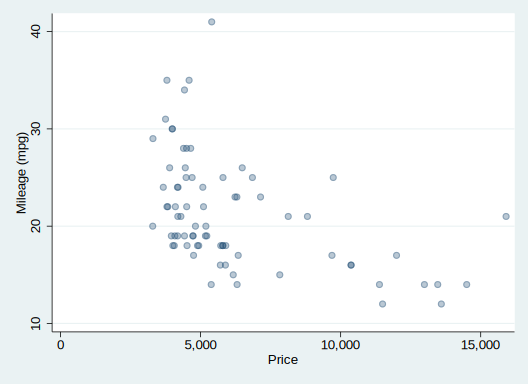

In [3]:
%%stata
sysuse auto, clear
summarize mpg
scatter mpg price, mcolor(%30)

Use **%%stata?** for all optional arguments. 

```
Optional arguments:

      -d DATA               Load a NumPy array or pandas dataframe 
                            into Stata as the current working dataset.

      -f DFLIST|ARRLIST     Load one or multiple NumPy arrays or 
                            pandas dataframes into Stata as frames. 
                            The arrays and dataframes should be 
                            separated by commas. Each array or 
                            dataframe is stored in Stata as a separate 
                            frame with the same name.

      -force                Force loading of the NumPy array or pandas 
                            dataframe into Stata as the current working 
                            dataset, even if the dataset in memory has 
                            changed since it was last saved; or force 
                            loading of the NumPy arrays or pandas dataframes 
                            into Stata as separate frames even if one or 
                            more of the frames already exist in Stata.

      -doutd DATAFRAME      Save the dataset in memory as a pandas 
                            dataframe when the cell completes.

      -douta ARRAY          Save the dataset in memory as a NumPy 
                            array when the cell completes.

      -foutd FRAMELIST      Save one or multiple Stata frames as pandas 
                            dataframes when the cell completes. The Stata 
                            frames should be separated by commas. Each 
                            frame is stored in Python as a pandas 
                            dataframe. The variable names in each frame 
                            will be used as the column names in the 
                            corresponding dataframe. 

      -fouta FRAMELIST      Save one or multiple Stata frames as NumPy 
                            arrays when the cell completes. The Stata frames 
                            should be separated by commas. Each frame is 
                            stored in Python as a NumPy array.

      -ret DICTIONARY       Store current r() results into a dictionary.

      -eret DICTIONARY      Store current e() results into a dictionary.

      -sret DICTIONARY      Store current s() results into a dictionary.

      -qui                  Run Stata commands but suppress output.

      -nogr                 Do not display Stata graphics.

      -gw WIDTH             Set graph width in inches, pixels, or centimeters; 
                            default is inches.

      -gh HEIGHT            Set graph height in inches, pixels, or centimeters; 
                            default is inches.

```

[The Second National Health and Nutrition Examination Survey](https://pubmed.ncbi.nlm.nih.gov/7344293/) (McDowell et al. 1981), is a dataset concerning health and nutritional status of adults and children in the US, contains 10,351 observations and 58 variables and is stored in a CSV file called nhanes2.csv. Among these variables is an indicator variable for hypertension (highbp) and the continuous variables age and weight.

In [4]:
import pandas as pd
import io
import requests

data = requests.get("https://www.stata.com/python/pystata/misc/nhanes2.csv").content
nhanes2 = pd.read_csv(io.StringIO(data.decode("utf-8")))
nhanes2.head(5)

,sampl,strata,psu,region,smsa,location,houssiz,sex,race,age,...,region4,smsa1,smsa2,smsa3,rural,loglead,agegrp,highlead,bmi,highbp
0,1400,1,1,S,2,1,4,Male,White,54,...,0,0,1,0,0,NaN,50-59,NaN,20.495686,0
1,1401,1,1,S,2,1,6,Female,White,41,...,0,0,1,0,0,2.564949,40-49,lead<25,21.022337,0
2,1402,1,1,S,1,1,6,Female,Other,21,...,0,1,0,0,0,NaN,20-29,NaN,24.973860,0
3,1404,1,1,S,2,1,9,Female,White,63,...,0,0,1,0,0,NaN,60-69,NaN,35.728722,1
4,1405,1,1,S,1,1,3,Female,White,64,...,0,1,0,0,0,2.995732,60-69,lead<25,27.923803,0


* Use the *-d* argument of the **%%stata magic** to load the dataframe into Stata. 
* Fit a logistic regression model using **age**, **weight**, and their interaction as predictors of the probability of hypertension. 
* Use *-eret* to push Stata's estimation results, including the coefficient vector e(b) and variance–covariance matrix e(V), into Python dictionary **myeret**.

In [5]:
%%stata -d nhanes2 -force -eret myeret
logistic highbp c.age##c.weight
ereturn list


. logistic highbp c.age##c.weight

Logistic regression                                    Number of obs =  10,351
                                                       LR chi2(3)    = 2381.23
                                                       Prob > chi2   =  0.0000
Log likelihood = -5860.1512                            Pseudo R2     =  0.1689

------------------------------------------------------------------------------
      highbp | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   1.108531   .0080697    14.15   0.000     1.092827     1.12446
      weight |   1.081505    .005516    15.36   0.000     1.070748    1.092371
             |
       c.age#|
    c.weight |   .9992788   .0000977    -7.38   0.000     .9990873    .9994703
             |
       _cons |   .0002025   .0000787   -21.89   0.000     .0000946    .0004335
-------------------------------------------------

Now back in Python, we have **myret** which contains a copy of Stata results **e(b)** and **e(V)**.

In [6]:
myeret ['e(b)'], myeret['e(V)']

(array([[ 1.03035513e-01,  7.83537342e-02, -7.21492384e-04,
         -8.50485078e+00]]),
 array([[ 5.29930771e-05,  3.50509317e-05, -6.97861002e-07,
         -2.69423163e-03],
        [ 3.50509317e-05,  2.60132664e-05, -4.74084051e-07,
         -1.94299575e-03],
        [-6.97861002e-07, -4.74084051e-07,  9.55811835e-09,
          3.50377699e-05],
        [-2.69423163e-03, -1.94299575e-03,  3.50377699e-05,
          1.50887842e-01]]))


. 
. quietly margins, at(age=(20(10)80))

. 
. marginsplot

Variables that uniquely identify margins: age

. 


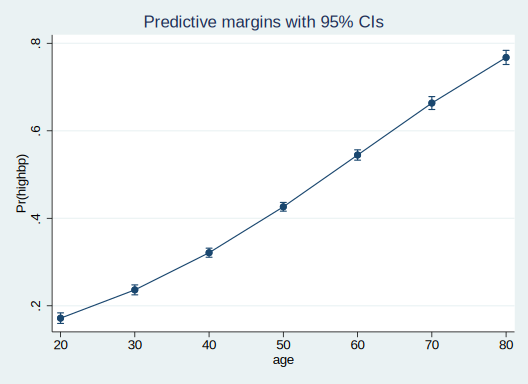

In [7]:
%%stata

quietly margins, at(age=(20(10)80))

marginsplot

We save results from **margins** to a Stata dataset, then use *-doutd* to save the dataset into a Python dataframe.

In [8]:
%%stata -doutd preddata

quietly margins, at(age=(20(5)80) weight=(40(5)180)) saving(predictions, replace)

use predictions, clear

list _at1 _at2 _margin in 1/5

rename _at1 age

rename _at2 weight

rename _margin pr_highbp


. 
. quietly margins, at(age=(20(5)80) weight=(40(5)180)) saving(predictions, repl
> ace)

. 
. use predictions, clear
(Created by command margins; also see char list)

. 
. list _at1 _at2 _margin in 1/5

     +------------------------+
     | _at1   _at2    _margin |
     |------------------------|
  1. |   20     40   .0200911 |
  2. |   20     45   .0274497 |
  3. |   20     50   .0374008 |
  4. |   20     55   .0507709 |
  5. |   20     60   .0685801 |
     +------------------------+

. 
. rename _at1 age

. 
. rename _at2 weight

. 
. rename _margin pr_highbp

. 


In [9]:
preddata[['age', 'weight', 'pr_highbp']].head()

,age,weight,pr_highbp
0,20,40,0.020091
1,20,45,0.027450
2,20,50,0.037401
3,20,55,0.050771
4,20,60,0.068580


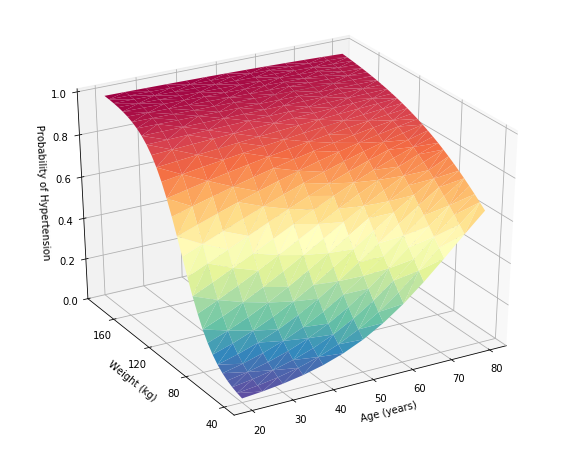

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

# define the axes
fig = plt.figure(1, figsize=(10, 8))
ax = plt.axes(projection='3d')

# plot
ax.plot_trisurf(preddata['age'], preddata['weight'], preddata['pr_highbp'],cmap=plt.cm.Spectral_r)

# set ticks and labels for x, y, and z axes
ax.set_xticks(np.arange(20, 90, step=10))
ax.set_yticks(np.arange(40, 200, step=40))
ax.set_zticks(np.arange( 0, 1.2, step=0.2))
ax.set_xlabel("Age (years)")
ax.set_ylabel("Weight (kg)")
ax.set_zlabel("Probability of Hypertension")
 
# adjust the view angle
ax.view_init(elev=30, azim=240)

# show the plot
plt.show()


. 
. clear

. 
. use https://www.stata-press.com/data/r17/bcgset
(Efficacy of BCG vaccine against tuberculosis; set with -meta esize-)

.     
. meta forestplot

  Effect-size label: Log risk-ratio
        Effect size: _meta_es
          Std. err.: _meta_se
        Study label: studylbl

. 


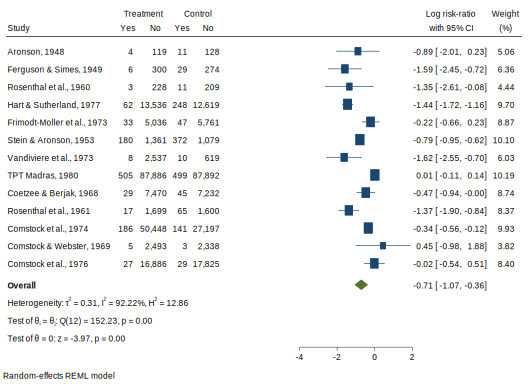

In [12]:
%%stata

clear

use https://www.stata-press.com/data/r17/bcgset
    
meta forestplot


. 
. meta forestplot

  Effect-size label: Log risk-ratio
        Effect size: _meta_es
          Std. err.: _meta_se
        Study label: studylbl

. 


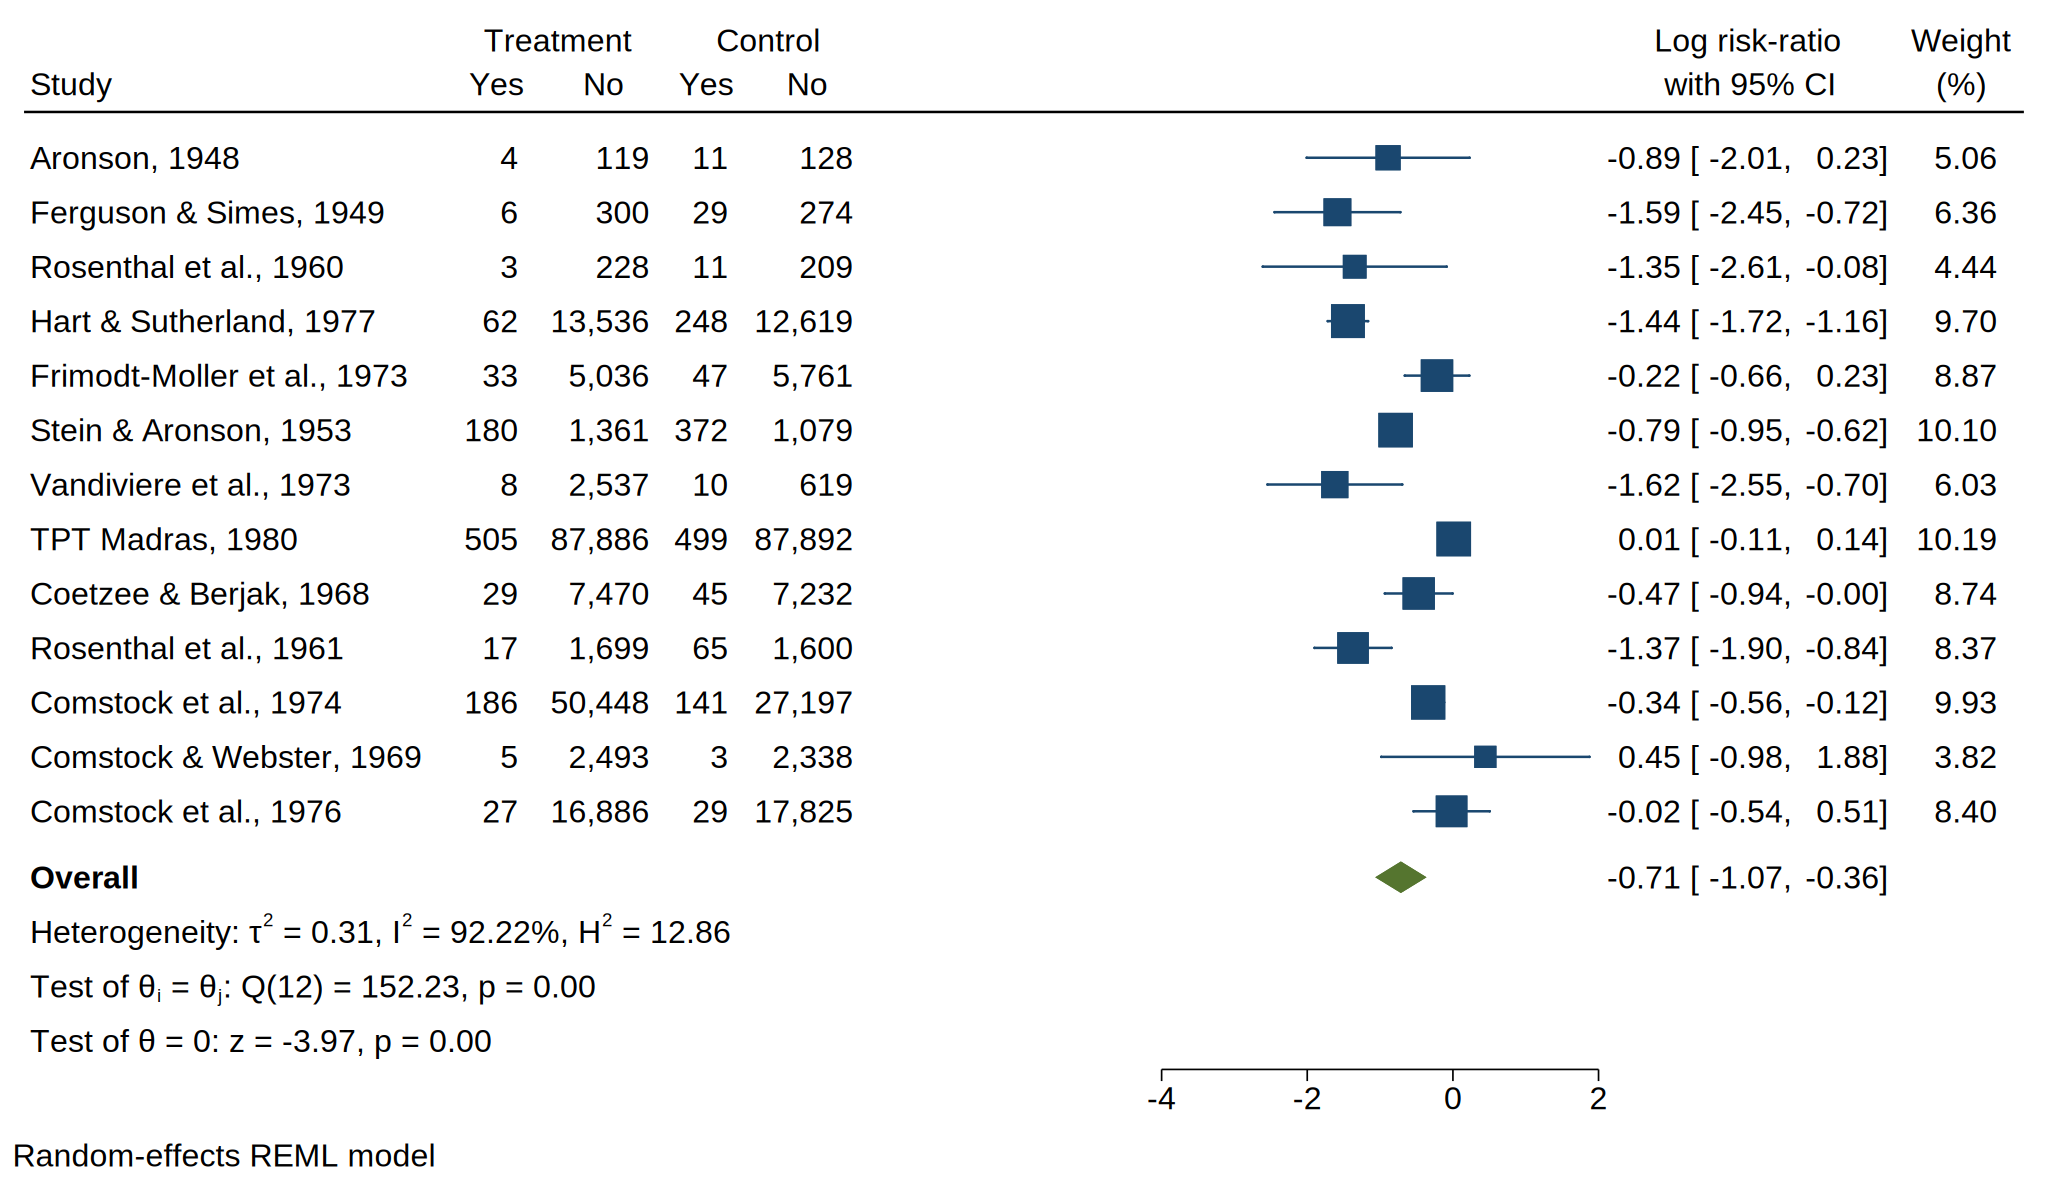

In [13]:
%%stata -gw 8in

meta forestplot

You may also use **%pystata set graph_size 8in**. Note it allows *perm* option to save the setting for subsequent sessions.